## Import libraries

In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Read the dataset


In [5]:
#Assign column names
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#Read the original training and test sets
df1 = pd.read_csv("/content/drive/My Drive/Dataset/NSL-KDD/KDDTrain+.txt", header = None, names = col_names)
df2 = pd.read_csv("/content/drive/My Drive/Dataset/NSL-KDD/KDDTest+.txt", header = None, names = col_names)

In [8]:
#display the dataset
df1

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [9]:
## Transform the dataset to binary dataset (normal & attack)
#"normal" label is set to 0, all attack labels are set to 1

df1.drop(['difficulty'], axis=1, inplace=True)
df2.drop(['difficulty'], axis=1, inplace=True)
df3=df1.drop(['label'], axis=1, inplace=True)
df4=df2.drop(['label'], axis=1, inplace=True)
df3

In [10]:
## Label encoding to transform string features to numerical features
# Using Label encoder to transform string features to numerical features
from sklearn.preprocessing import LabelEncoder
def Encoding (df):
    cat_features=[x for x in df.columns if df[x].dtype=="object"]
    le=LabelEncoder()
    for col in cat_features:
        if col in df.columns:
            i = df.columns.get_loc(col)
            df.iloc[:,i] = df.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')
    return df

In [11]:
df1 = Encoding(df1)
df2 = Encoding(df2)

In [12]:
df10 = pd.read_csv("/content/drive/My Drive/Dataset/NSL-KDD/KDDTrain+.txt", header = None, names = col_names)
df11 = pd.read_csv("/content/drive/My Drive/Dataset/NSL-KDD/KDDTest+.txt", header = None, names = col_names)

In [13]:
df10['label']
df10['label'][df10['label']=='normal']=0
df10['label'][df10['label']!=0]=1
df11['label'][df11['label']=='normal']=0
df11['label'][df11['label']!=0]=1
df7 = pd.concat([df1, df10['label']], axis=1)
df8 = pd.concat([df2, df11['label']], axis=1)

## Save pre-processed dataset  

In [14]:
# df1: training set  
# df2: test set  
# df: training & test set
df = df7.append(df8)

In [15]:
df7.to_csv('/content/drive/My Drive/Dataset/NSL_KDD_binary_train.csv',index=0)
df8.to_csv('/content/drive/My Drive/Dataset/NSL_KDD_binary_test.csv',index=0)

In [16]:
df.to_csv('/content/drive/My Drive/Dataset/NSL_KDD_binary(train+test).csv',index=0)

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import time
import warnings
warnings.filterwarnings("ignore")

# Read the dataset

In [18]:
#Read the training and test set
df1 = pd.read_csv("/content/drive/My Drive/Dataset/NSL_KDD_binary_train.csv")
df2 = pd.read_csv("/content/drive/My Drive/Dataset/NSL_KDD_binary_test.csv")

In [19]:
df2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,0,0,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1
2,2,53,53,53,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0
3,0,0,0,0,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1
4,1,1,1,1,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,0,0,0,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,0
22540,0,0,0,0,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,0
22541,0,0,0,0,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1
22542,0,0,0,0,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,0


In [20]:
# Split the dataset for training and testing purposes.

X_train = df1.iloc[:, :-1].values
y_train = df1.iloc[:, -1].values
X_test = df2.iloc[:, :-1].values
y_test = df2.iloc[:, -1].values

In [21]:
df2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,0,0,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1
2,2,53,53,53,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0
3,0,0,0,0,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1
4,1,1,1,1,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,0,0,0,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,0
22540,0,0,0,0,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,0
22541,0,0,0,0,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1
22542,0,0,0,0,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,0


# KNN

              precision    recall  f1-score   support

           0       0.65      0.97      0.78      9711
           1       0.97      0.60      0.74     12833

    accuracy                           0.76     22544
   macro avg       0.81      0.79      0.76     22544
weighted avg       0.83      0.76      0.76     22544

Accuracy: 0.7599804826117814


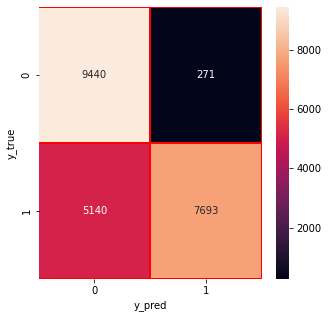

CPU times: user 48.4 s, sys: 2.99 s, total: 51.4 s
Wall time: 41.7 s


In [22]:
%%time 
# Print out execution time

# KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train) # Model training
y_pred = classifier.predict(X_test) # Model testing
print(classification_report(y_test,y_pred))
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))
knn_acc=accuracy_score(y_test, y_pred)
# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()